# Supervised Learning Algorithms

In this notebook, we will dive deeper into the following supervised learning algorithms:
1. Decision Trees
2. Random Forests
3. Support Vector Machines (SVM)

Each algorithm plays a critical role in classification and regression tasks and is widely used in real-world applications.

---

## 1. Decision Trees

**Decision Trees** are a type of algorithm that splits data into subsets based on feature values. At each split (or node), the algorithm chooses the feature that best separates the data into the most homogeneous subsets.

### Key Characteristics of Decision Trees:
- Simple to understand and interpret.
- Can handle both numerical and categorical data.
- Prone to overfitting if not pruned.

### Visual Representation:
Imagine a tree where each node asks a yes/no question (e.g., Is the value of 'age' greater than 30?). The branches represent the possible answers (Yes/No), and the leaves represent the predicted outcome (e.g., Will the person default on a loan?).


### **Decision Trees: Working Mechanism**

A **Decision Tree** is a tree-like structure where each internal node represents a decision (based on a feature), each branch represents the outcome of the decision, and each leaf node represents a class label (for classification) or a value (for regression).

#### **Step-by-step process of how a Decision Tree works**:

1. **Splitting the Data**:
   - At each node, the tree asks a question about one of the features (e.g., “Is the feature `X` greater than a certain value?”).
   - Based on the answer (Yes/No), the data is split into two groups.
   
2. **Choosing the Best Split**:
   - The algorithm chooses the feature and the value that splits the data in the best way. The goal is to reduce the uncertainty or impurity in the data after the split.
   
3. **Recursively Building the Tree**:
   - The process of splitting continues for each branch of the tree, with new questions asked at each node.
   - The tree keeps splitting the data until it can’t be split anymore or it reaches a predefined depth.

4. **Predicting the Outcome**:
   - Once the tree is built, new data is passed through it. Based on the answers to the questions at each node, the data will end up at one of the leaf nodes, which provides the final prediction.

---

### **Mathematical Foundation**:

The core idea behind Decision Trees is to find the best way to split the data at each node. The "best" split is the one that reduces the impurity or disorder of the data. Here are some key concepts:

#### **1. Gini Impurity** (used in classification tasks):
- Gini Impurity is a measure of how "pure" a node is. A node is "pure" if all of its data belongs to the same class.
  
- **Formula**:
  ![\Large Gini = 1 - \sum_{i=1}^{n} p_i^2](https://latex.codecogs.com/svg.latex?\Large&space;Gini=1-\sum_{i=1}^{n}p_i^2) 

  
  
  Where:
  - \( p<sub>i</sub> \) is the probability of class \( i \) in the node.

  **Example**: 
  - If a node has 90% class "A" and 10% class "B", its Gini Impurity would be:
    \[
    Gini = 1 - (0.9^2 + 0.1^2) = 1 - (0.81 + 0.01) = 0.18
    \]
  - The Gini Impurity decreases as the node becomes more pure.

#### **2. Information Gain** (used in classification tasks):
- Information gain tells us how much the uncertainty (or entropy) of the data decreases after a split.

- **Formula**:
  ![\Large \text{InformationGain} = \text{Entropy(before)} - \text{Entropy(after)}](https://latex.codecogs.com/svg.latex?\Large&space;\text{InformationGain}=\text{Entropy(before)}-\text{Entropy(after)}) 

  **Entropy** measures the disorder in the data and is defined as:
  
  ![\Large Entropy={-\sum_{i=1}^{n}p_i\log_2}p_i](https://latex.codecogs.com/svg.latex?\Large&space;Entropy={-\sum_{i=1}^{n}p_i\log_2}p_i) 

  
  
  
  

  **Example**:
  - Before the split, suppose the entropy is 1 (completely mixed classes).
  - After the split, if the data is well separated, the entropy will decrease, resulting in higher information gain.

#### **3. Entropy** (used in classification tasks):
- Entropy is another measure of disorder, used to decide which split will result in the most ordered data.

  **Example**:
  - If a node has 50% class "A" and 50% class "B", the entropy would be higher (since the node is more "disordered").
  - If a node has 90% class "A" and 10% class "B", the entropy would be lower (since the node is more "ordered").

#### **4. Mean Squared Error (MSE)** (used in regression tasks):
- In regression trees, we use Mean Squared Error (MSE) to decide how to split the data.

- **Formula**:
![\Large MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y})^2](https://latex.codecogs.com/svg.latex?\Large&space;MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y})^2) 

  Where:
  - \( y<sub>i</sub> \) is the actual value,
  - \( ![\Large\hat{y}](https://latex.codecogs.com/svg.latex?\Large&space;\hat{y}) 
 \) is the predicted value (average value of the node),
  - \( n \) is the number of samples.

  The goal is to minimize MSE, meaning that we want the predicted values to be as close to the actual values as possible.

---

### **Simplified Example**:

Let’s imagine you're building a decision tree to predict whether a person will buy a car based on their age and income.

1. **First Question (Node 1)**: Is the person’s income greater than  Rs. 50,000?
   - Yes → Go to the next question.
   - No → Predict “Will not buy” (Leaf node).

2. **Second Question (Node 2)**: Is the person’s age greater than 30?
   - Yes → Predict “Will buy” (Leaf node).
   - No → Predict “Will not buy” (Leaf node).

In this example, the decision tree is asking questions that split the data in a way that makes it easier to predict whether a person will buy a car.

- **Decision Trees** split data into smaller and smaller subsets based on features, asking simple yes/no questions at each node.
- The goal is to keep splitting the data until each group is as "pure" as possible (i.e., all samples in a group belong to the same class).
- We use metrics like **Gini Impurity**, **Entropy**, or **MSE** to determine the best splits and build an efficient tree.

In the next steps, we will visualize how the decision tree works and how it splits data in action!

### **Code Example:**
Let's create a decision tree classifier on a simple dataset.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

#### Importing Libraries:
- ```sklearn.datasets```: 
We are using the load_iris function from the datasets module to load the Iris dataset. The Iris dataset contains data about different species of iris flowers and their features (sepal length, sepal width, petal length, and petal width).
- ```DecisionTreeClassifier```: This is the class that implements a decision tree classifier in Scikit-learn. It helps us create and train a decision tree model.
- ```train_test_split```: This function is used to split the dataset into training and testing sets, so we can train the model on one set and evaluate it on another.
- ```tree```: This is a module from Scikit-learn used to work with decision trees. We will use it to visualize the decision tree.
- ```matplotlib.pyplot```: This is a popular library for creating visualizations in Python. We use it here to visualize the decision tree.


In [4]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

#### Loading the Iris Dataset

- **`load_iris()`**: This function loads the Iris dataset, which contains 150 samples of iris flowers. Each sample has 4 features: 
  - **Sepal length** 
  - **Sepal width** 
  - **Petal length** 
  - **Petal width**

- **`X = iris.data`**: The variable `X` stores the feature values for the dataset (sepal length, sepal width, petal length, and petal width).

- **`y = iris.target`**: The variable `y` stores the labels (species of the iris flower: Setosa, Versicolour, and Virginica).

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Splitting the Dataset:
- `train_test_split(X, y, test_size=0.3, random_state=42)`: This function splits the dataset into training and testing sets.
- `X_train, y_train`: These are the training feature values and labels (used to train the model).
- `X_test, y_test`: These are the testing feature values and labels (used to evaluate the model).
- `test_size=0.3`: This means that 30% of the data will be used for testing, and 70% will be used for training.
- `random_state=42`: Setting a random seed ensures that the split is reproducible (same results every time you run the code).

In [6]:
# Train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

#### Training the Decision Tree Classifier:
- `DecisionTreeClassifier()`: This creates a decision tree model.
- `clf.fit(X_train, y_train)`: The `.fit()` method trains the model using the training data (`X_train, y_train`). The model will learn to make predictions by finding patterns in the training data.

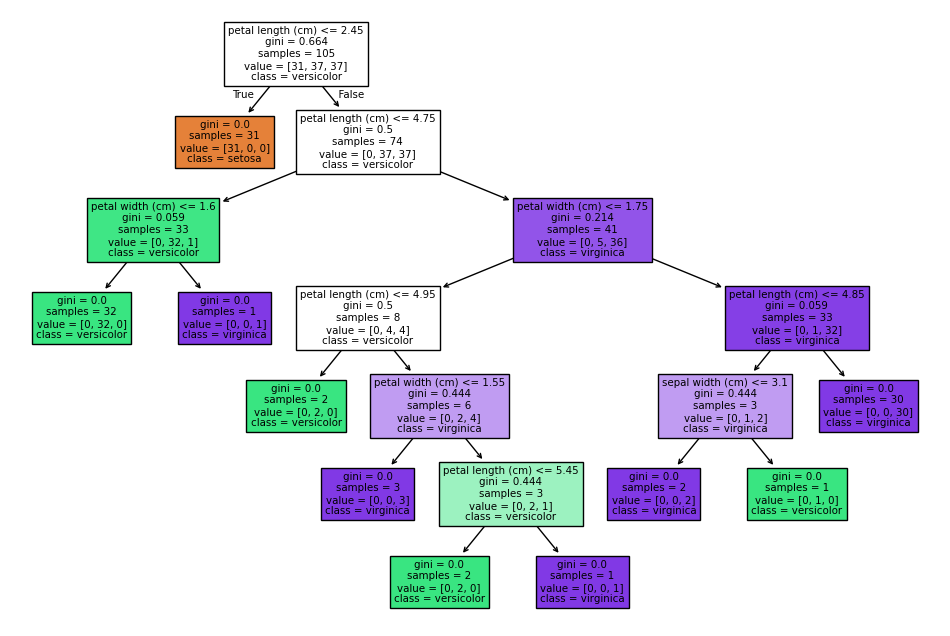

In [7]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

#### Visualizing the Decision Tree:
- `plt.figure(figsize=(12, 8))`: This creates a new figure with a specified size (12x8 inches) for the decision tree plot.
- `tree.plot_tree()`: This function from Scikit-learn’s tree module generates a plot of the trained decision tree.
- `clf`: This is the trained decision tree model.
- `filled=True`: This option fills the nodes with colors based on the majority class in each node, making it easier to distinguish between classes.
- `feature_names=iris.feature_names`: This adds the feature names (sepal length, sepal width, etc.) to the plot for better understanding.
- `class_names=iris.target_names`: This adds the class names (Setosa, Versicolour, Virginica) to the plot.
- `plt.show()`: This displays the plot.

#### The Decision Tree Plot:
The root node at the top of the tree is the first question that the model asks (e.g., “Is petal length greater than X cm?”).
- Each internal node asks a yes/no question to split the data into two groups.
- Leaf nodes are the final predictions, where the tree assigns a class label (Setosa, Versicolour, or Virginica).

Summary of Code Execution:

1. We load the Iris dataset, which contains data about iris flowers (features) and their species (labels).
2. We split the dataset into training and testing sets to train the model and evaluate its performance on unseen data.
3. We create a Decision Tree Classifier and train it using the training data.
4. We visualize the structure of the trained decision tree using a plot, which shows how the tree makes decisions based on the features of the dataset.

---